[JWarmenhoven](https://github.com/JWarmenhoven/ISLR-python)

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

# Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html
auto = pd.read_csv('data/Auto.csv', na_values='?').dropna()
auto['horsepower2'] = auto.horsepower**2
auto['horsepower3'] = auto.horsepower**3
auto['horsepower4'] = auto.horsepower**4
auto['horsepower5'] = auto.horsepower**5
print(auto.head())
print()
print(auto.info())
print()
print(auto.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  horsepower2  horsepower3  horsepower4  \
0       1  chevrolet chevelle malibu      16900.0    2197000.0  285610000.0   
1       1          buick skylark 320      27225.0    4492125.0  741200625.0   
2       1         plymouth satellite      22500.0    3375000.0  506250000.0   
3       1              amc rebel sst      22500.0    3375000.0  506250000.0   
4       1                ford torino      19600.0    2744000.0  384160000.0   

    horsepower5  
0  3.712930e+10  
1  1.222981e+11  
2  7.593750e+1

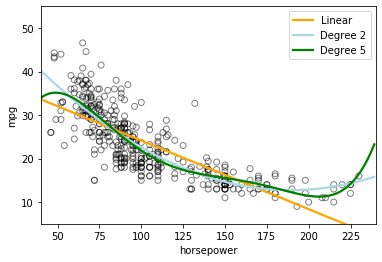

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

x = auto.horsepower
y = auto.mpg

# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(x, y, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(x, y, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x, y, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(x, y, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

# linear fit
X = auto.horsepower.values.reshape((-1, 1))  
y = auto.mpg

regr = LinearRegression()
regr.fit(X, y)
auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1
print(auto.head())

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']] 

regr.fit(X2, y)
auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2
print(auto.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  horsepower2  horsepower3  horsepower4  \
0       1  chevrolet chevelle malibu      16900.0    2197000.0  285610000.0   
1       1          buick skylark 320      27225.0    4492125.0  741200625.0   
2       1         plymouth satellite      22500.0    3375000.0  506250000.0   
3       1              amc rebel sst      22500.0    3375000.0  506250000.0   
4       1                ford torino      19600.0    2744000.0  384160000.0   

    horsepower5      pred1    resid1  
0  3.712930e+10  19.416046 -1

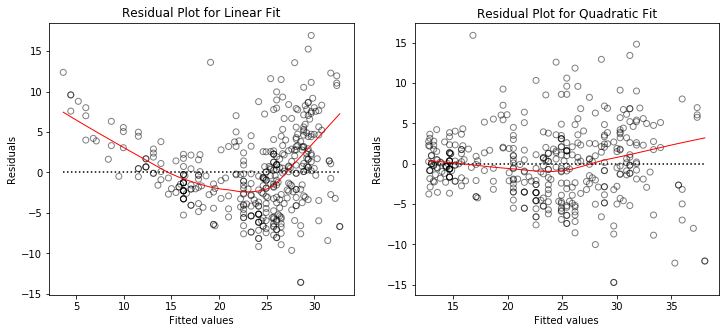

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

# Left plot
sns.regplot(auto.pred1, auto.resid1, 
            lowess=True, 
            ax=ax1, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], 
           linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, 
            lowess=True,
            ax=ax2,
            line_kws={'color':'r', 'lw':1}, 
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,
           xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], 
           linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    
plt.show()

statsmodel.formula.api versus statsmodel.api

The difference is due to the presence of intercept or not:

- in statsmodels.formula.api, similarly to the R approach, a constant is automatically added to your data and an intercept in fitted
- in statsmodels.api, you have to add a constant yourself (see the documentation here). Try using add_constant from statsmodels.api

https://stackoverflow.com/questions/30650257/ols-using-statsmodel-formula-api-versus-statsmodel-api

$$\begin{array}{lll}
\frac{\hat\beta_i-\beta_i}{\sigma\sqrt{(X^TX)^{-1}_{ii}}}&\sim& N(0,1)\\
\frac{\hat\beta_i-\beta_i}{s\sqrt{(X^TX)^{-1}_{ii}}}&\sim& t_{n-p}\\
\end{array}$$
where
$$\begin{array}{lll}
\mbox{SE}(\hat\beta_i)&=&s\sqrt{(X^TX)^{-1}_{ii}}\\
s^2&=&\frac{\sum_{i=1}^n(X\hat\beta-Y)_i^2}{n-p}\\
\end{array}$$

https://stats.stackexchange.com/questions/286179/why-is-a-t-distribution-used-for-hypothesis-testing-a-linear-regression-coeffici

https://stats.stackexchange.com/questions/20227/why-is-rss-distributed-chi-square-times-n-p

In [12]:
import statsmodels.formula.api as smf

est = smf.ols('mpg ~ horsepower', auto).fit()
print(est.summary().tables[1])
# print(est.predict(auto.horsepower))
# print(est.predict(auto[['horsepower']]))
# print(est.predict([[130.0]])) # error
# print(est.predict([{'horsepower': 130.0}])) # error
# print(est.predict({'horsepower': 130.0})) # OK

est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
print(est.summary().tables[1])
# print(est.predict(auto[['horsepower', 'horsepower2']]))
# print(est.predict([[130.0, 16900.0]])) # error
# print(est.predict([{'horsepower': 130.0, 'horsepower2': 16900.0}])) # error
# print(est.predict({'horsepower': 130.0, 'horsepower2': 16900.0})) # OK

est = smf.ols('mpg ~ horsepower + horsepower2 + horsepower3', auto).fit()
print(est.summary().tables[1])
#print(est.predict(auto[['horsepower', 'horsepower2', 'horsepower3']]))

est = smf.ols('mpg ~ horsepower + horsepower2 + horsepower3 + horsepower4', auto).fit()
print(est.summary().tables[1])
#print(est.predict(auto[['horsepower', 'horsepower2', 'horsepower3', 'horsepower4']]))

est = smf.ols('mpg ~ horsepower + horsepower2 + horsepower3 + horsepower4 + horsepower5', auto).fit()
print(est.summary().tables[1])
#print(est.predict(auto[['horsepower', 'horsepower2', 'horsepower3', 'horsepower4', 'horsepower5']]))

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.6848      4.563     13.298      0.000      51.713      69.657
horsepower     -0.5689      0.118     -4.824